# **STEEL INDUSTRY LOAD TYPE PREDICTION**

## Introduction
In the steel industry, predicting the type of load accurately is crucial for optimizing operations, ensuring safety, and improving productivity. This project uses machine learning techniques to classify the load type based on various operational parameters, such as Energy Usage, Reactive power, power factor and other measurements.

This project involves exploring a dataset from the steel industry and creating a machine learning to predict the target variable: 'Load Type'. By leveraging data-driven methods, we aim to gain insights into operational patterns and create a robust predictive model.


## Goal of the Project
The primary objective of this project is to build an accurate and reliable machine learning model to predict the 'Load Type'. This will help steel manufacturers optimize their operations.

### Key Objectives:
1. Understand the dataset and derive useful insights.
2. Clean and preprocess the data to make it suitable for modeling.
3. Train and compare multiple machine learning models.
4. Identify the best-performing model using metrics.

## Data Story
### Dataset Description:
The dataset used in this project originates from the steel industry and contains the following:
- **Features**: Operational metrics such as energy usage, reactive power, power factors, CO2 emissions, and temporal information.
- **Target Variable**: 'Load_Type', representing the type of load being processed.
- **Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)
### Dataset Structure:
- **Number of Rows**: 35040
- **Number of Columns**: 11
- **Data Types**: Contains Integer, Float and Object

### Importance of Dataset:
This dataset helps uncover patterns in steel industry operations, contributing to better decision-making and increased efficiency.

## **Import necessary Libraries**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

import warnings
warnings.filterwarnings("ignore")

## **Load Data**

In [54]:
#Load the dataset and print first few rows in the dataset
df = pd.read_csv('Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


## **Data Cleaning and Preprocessing**

In [55]:
#Drop the index column
df.reset_index(drop=True, inplace = True)
df.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [56]:
df.tail(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35030,31/12/2018 21:45,3.42,0.00,13.36,0.0,100.00,24.80,78300,Weekday,Monday,Light_Load
35031,31/12/2018 22:00,3.42,0.00,13.07,0.0,100.00,25.31,79200,Weekday,Monday,Light_Load
35032,31/12/2018 22:15,3.24,3.38,0.22,0.0,69.20,99.77,80100,Weekday,Monday,Light_Load
35033,31/12/2018 22:30,3.67,4.43,0.00,0.0,63.80,100.00,81000,Weekday,Monday,Light_Load
35034,31/12/2018 22:45,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,Light_Load
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [57]:
# Display the shape of the DataFrame
df.shape 
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  35040
Number of Columns:  11


In [58]:
# Display column names
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [59]:
#Rename some columns
df =df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})

In [60]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          35040 non-null  object 
 1   Usage_kWh                     35040 non-null  float64
 2   Lagging_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                           35040 non-null  float64
 5   Lagging_Power_Factor          35040 non-null  float64
 6   Leading_Power_Factor          35040 non-null  float64
 7   NSM                           35040 non-null  int64  
 8   WeekStatus                    35040 non-null  object 
 9   Day_of_week                   35040 non-null  object 
 10  Load_Type                     35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [61]:
# Display descriptive statistics for numeric columns
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Reactive_Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2,35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [62]:
# Display descriptive statistics for categorical columns
df.describe(include = 'object').T

,count,unique,top,freq
date,35040,35040,01/01/2018 00:15,1
WeekStatus,35040,2,Weekday,25056
Day_of_week,35040,7,Monday,5088
Load_Type,35040,3,Light_Load,18072


In [63]:
#Check if there is any duplicates 
df.duplicated().sum()

0

This dataset does not have any duplicate values.

In [64]:
#Check if there is missing value 
df.isnull().sum()

date                            0
Usage_kWh                       0
Lagging_Reactive_Power_kVarh    0
Leading_Reactive_Power_kVarh    0
CO2                             0
Lagging_Power_Factor            0
Leading_Power_Factor            0
NSM                             0
WeekStatus                      0
Day_of_week                     0
Load_Type                       0
dtype: int64

**Missing Values**: After analyzing the dataset, it was found that there are no missing values in any of the columns. This ensures that the data is complete and ready for preprocessing without requiring any imputation or removal steps.

In [65]:
df["date"].value_counts()

date
01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: count, Length: 35040, dtype: int64

In [66]:
#Drop the 'date' column as it contained unique values, adding no meaningful information for modeling or analysis.
df.drop(columns=['date'],inplace=True)

In [67]:
df.shape

(35040, 10)

In [68]:
#count the value for load type 
df["Load_Type"].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [69]:
df["Load_Type"].describe()

count          35040
unique             3
top       Light_Load
freq           18072
Name: Load_Type, dtype: object

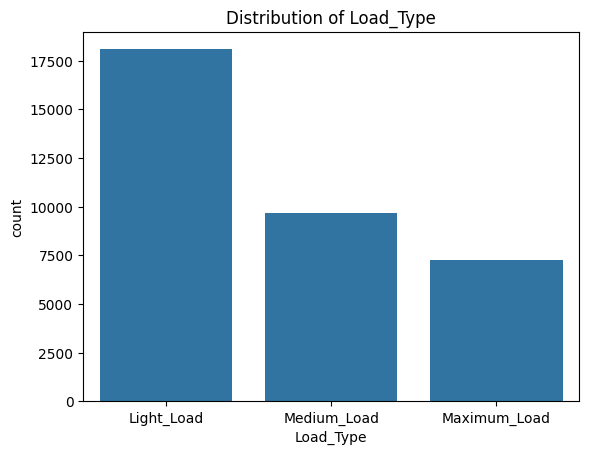

In [70]:
sns.countplot(data=df, x='Load_Type')
plt.title('Distribution of Load_Type')
plt.show()

## Initial Insights
From the initial data exploration:
1. The dataset contains 35040 rows and 11 columns.
2. Several features are categorical and numerical.
3. The target variable, 'Load Type', is a categorical feature with Light load, Medium load and Maximum load.

## **Exploratory Data Analysis**

In [71]:
#Summary statistics of the dataset
df.describe()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [72]:
#Summary statistics of categorical data
df.describe(include = 'object')

,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040
unique,2,7,3
top,Weekday,Monday,Light_Load
freq,25056,5088,18072


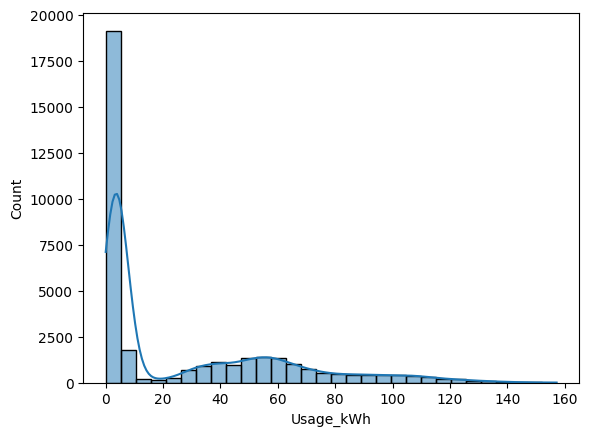

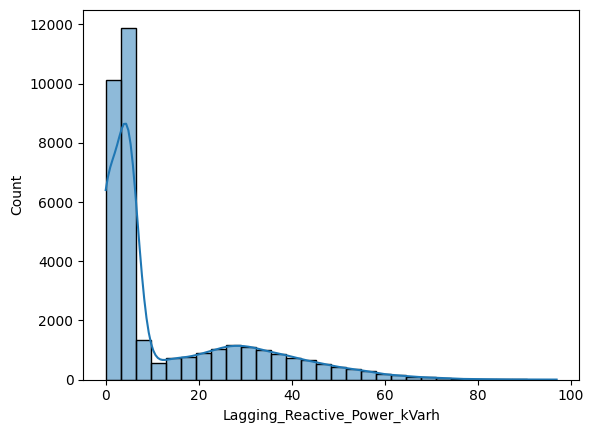

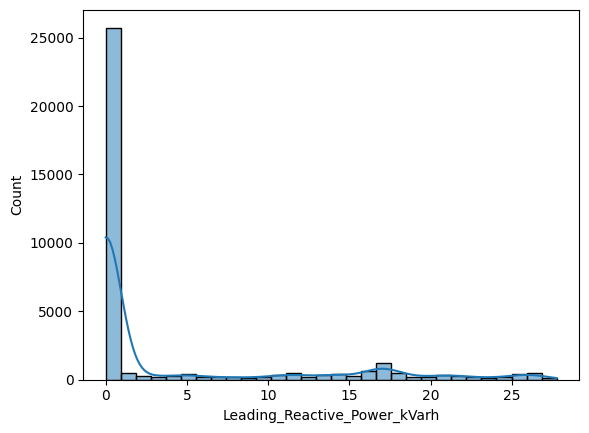

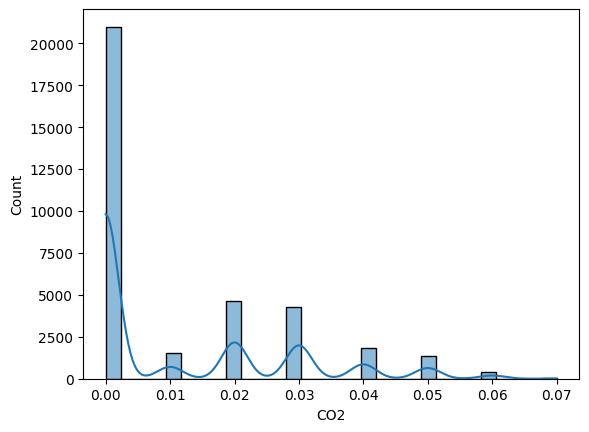

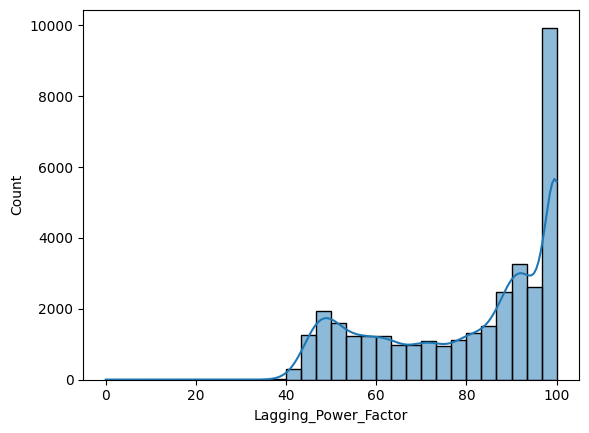

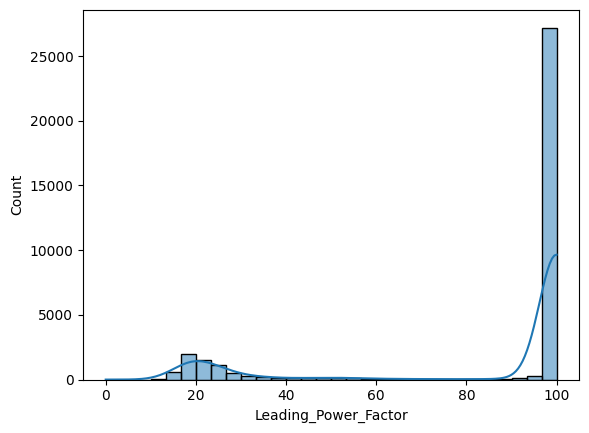

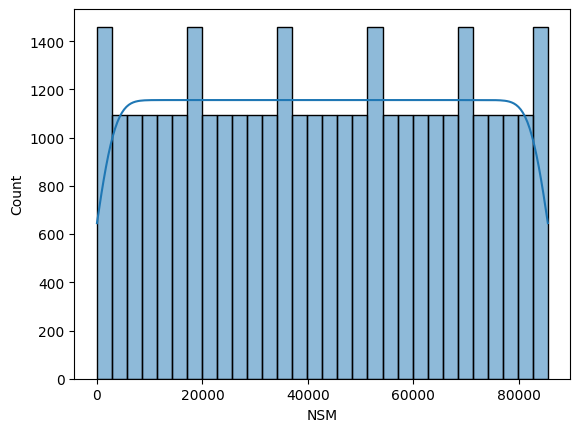

In [73]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

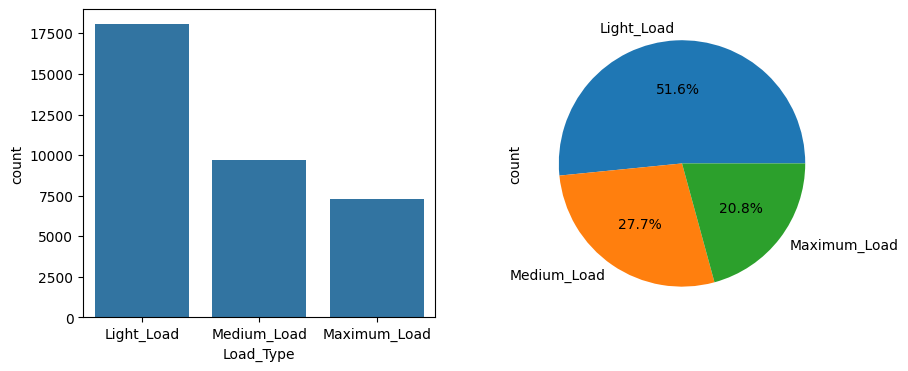

In [74]:
#Check target "Load_Type" distribution and % 

fig, ax =plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df, x="Load_Type", ax=ax[0])
loadtype_count = df.Load_Type.value_counts()
loadtype_count.plot(kind='pie' ,ax=ax[1],autopct='%1.1f%%')
fig.show()

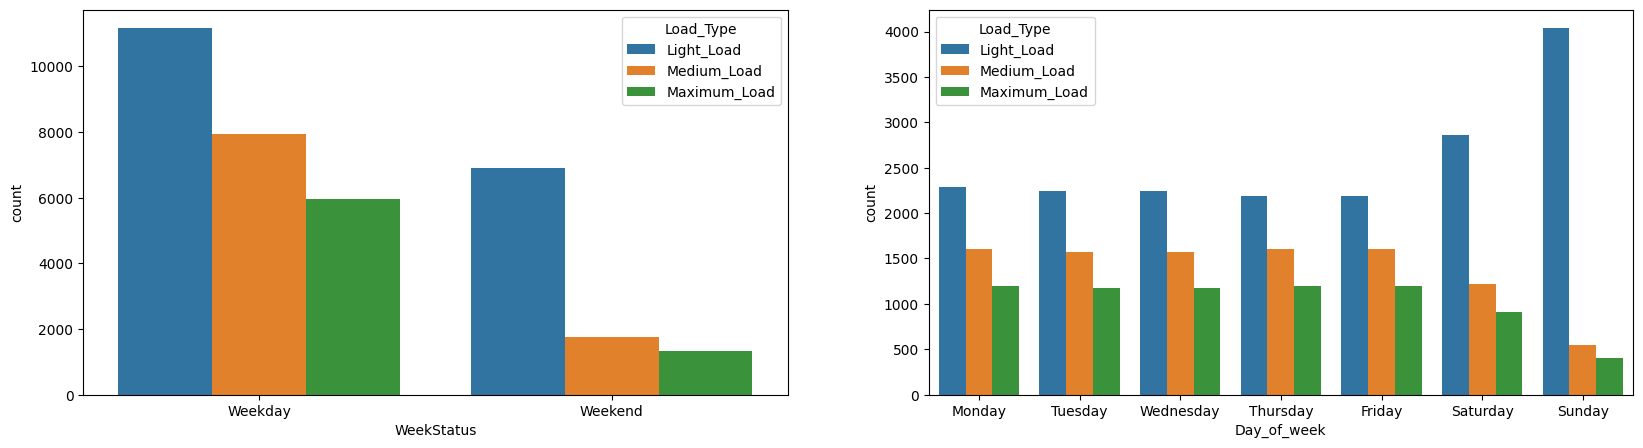

In [75]:
#Plot the categorical columns WeekStatus and Day_of_week and divided by Target - Load type 

fig, ax =plt.subplots(1,2, figsize=(20,5))
sns.countplot(data=df, x="WeekStatus", hue="Load_Type",ax=ax[0])
sns.countplot(data=df, x="Day_of_week", hue="Load_Type",ax=ax[1])
fig.show()

In [76]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


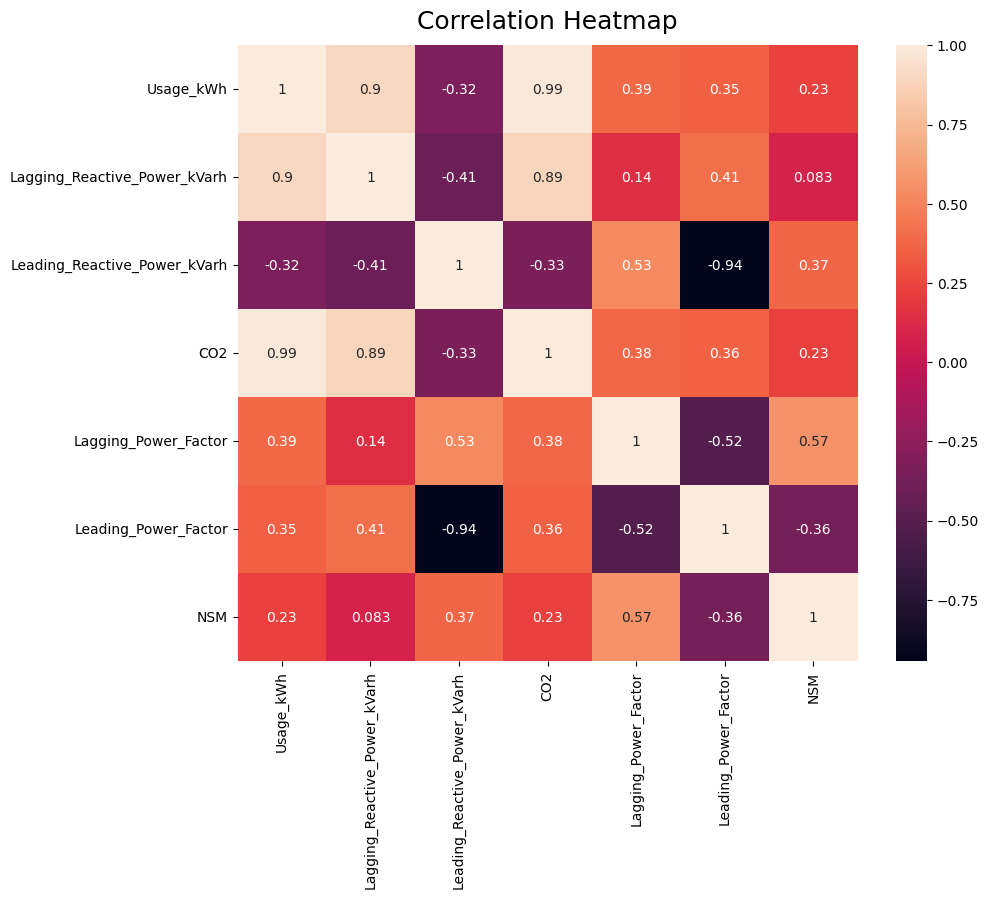

In [77]:
#Plot the heatmap of the correlation.
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [78]:
# Calculate skewness for numeric columns
numeric_col = df.select_dtypes(include=['float64', 'int64'])
skewness_values = numeric_col.skew()

skewness_values

Usage_kWh                       1.197394
Lagging_Reactive_Power_kVarh    1.437899
Leading_Reactive_Power_kVarh    1.734314
CO2                             1.149355
Lagging_Power_Factor           -0.606126
Leading_Power_Factor           -1.511984
NSM                             0.000000
dtype: float64

In [79]:
transformed_data = numeric_col.copy()

# Apply log transformation to positively skewed data 
for col in ['Usage_kWh', 'Lagging_Reactive_Power_kVarh', 
            'Leading_Reactive_Power_kVarh', 'CO2']:
    transformed_data[col] = np.log1p(transformed_data[col])

# Reflect and apply log transformation to negatively skewed data
for col in ['Lagging_Power_Factor', 'Leading_Power_Factor']:
    transformed_data[col] = np.log1p(transformed_data[col].max() - transformed_data[col])

# Recalculate skewness after transformation
transformed_skewness = transformed_data.skew()

transformed_skewness

Usage_kWh                       0.489613
Lagging_Reactive_Power_kVarh   -0.019717
Leading_Reactive_Power_kVarh    1.266096
CO2                             1.128555
Lagging_Power_Factor           -0.479364
Leading_Power_Factor            1.367188
NSM                             0.000000
dtype: float64

In [80]:
# Apply Box-Cox transformation to highly skewed variables
for col in ['Leading_Reactive_Power_kVarh', 'Leading_Power_Factor']:
    # Shift data to be strictly positive if needed
    if transformed_data[col].min() <= 0:
        transformed_data[col] += abs(transformed_data[col].min()) + 1
    # Apply Box-Cox transformation
    transformed_data[col], _ = boxcox(transformed_data[col])

# Recalculate skewness after further transformations
final_skewness = transformed_data.skew()

final_skewness


Usage_kWh                       0.489613
Lagging_Reactive_Power_kVarh   -0.019717
Leading_Reactive_Power_kVarh    0.961219
CO2                             1.128555
Lagging_Power_Factor           -0.479364
Leading_Power_Factor            1.169292
NSM                             0.000000
dtype: float64

<Figure size 1200x800 with 0 Axes>

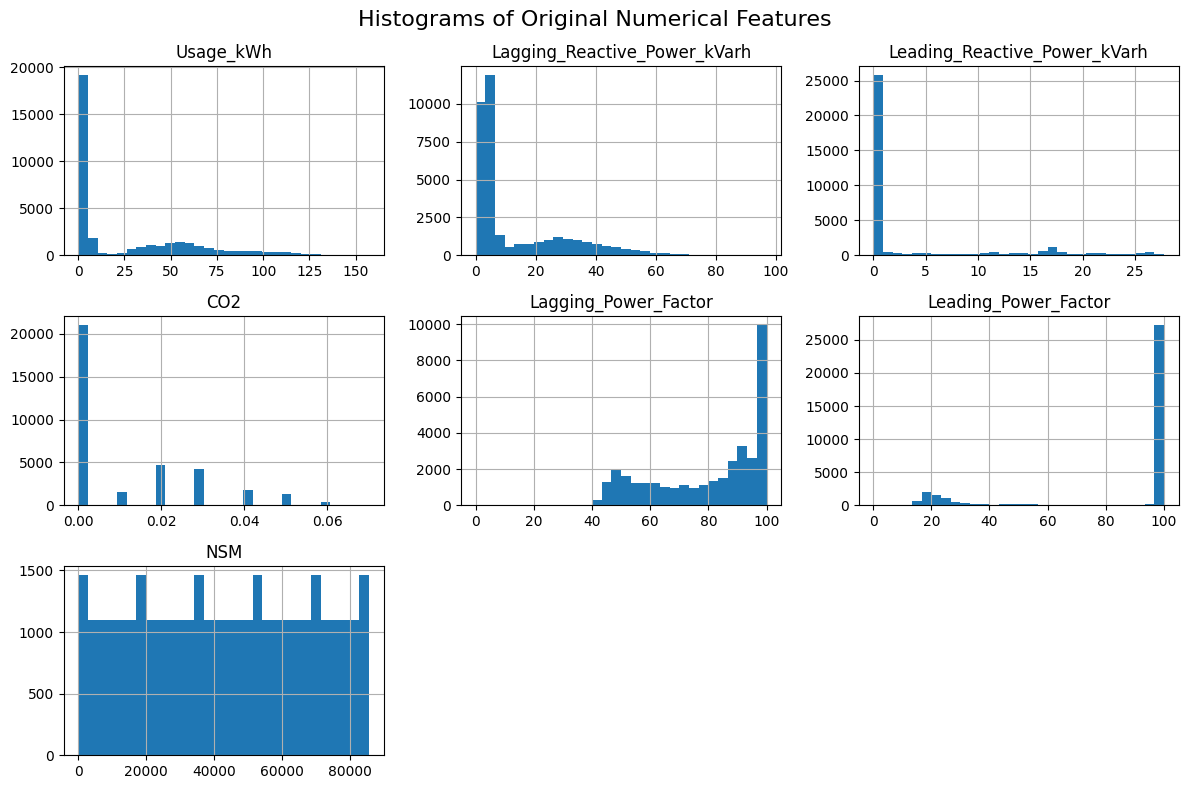

<Figure size 1200x800 with 0 Axes>

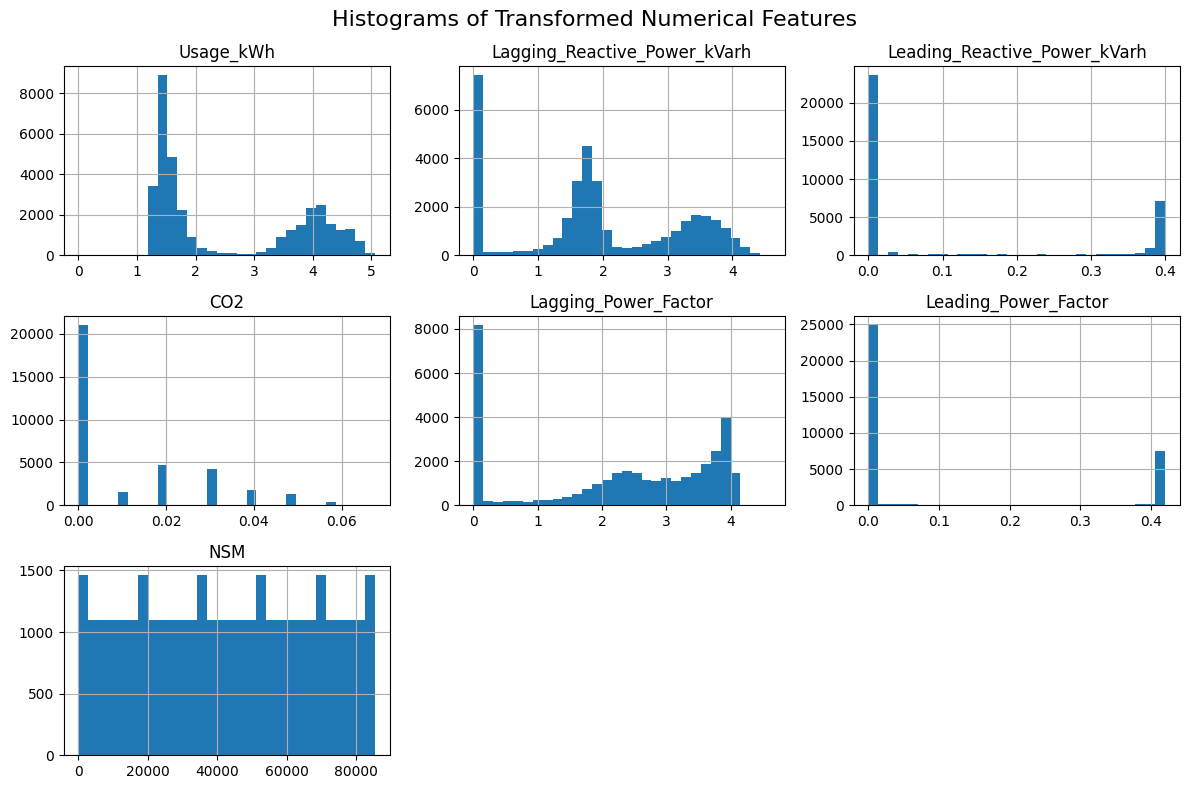

In [81]:
numerical_features = numeric_col.select_dtypes(include=['float64', 'int64'])

# Plot histograms for original data
plt.figure(figsize=(12, 8))
numerical_features.hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Original Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Plot histograms for transformed data
plt.figure(figsize=(12, 8))
transformed_data[numerical_features.columns].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Transformed Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

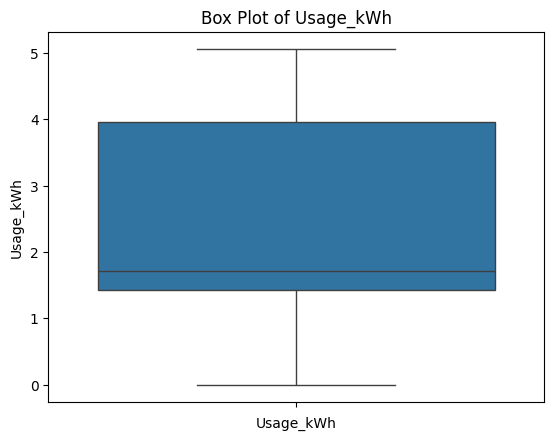

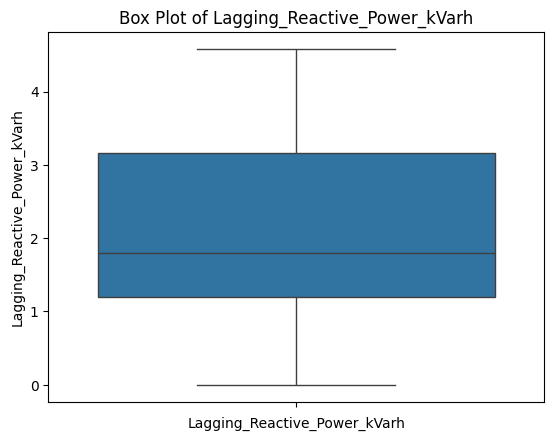

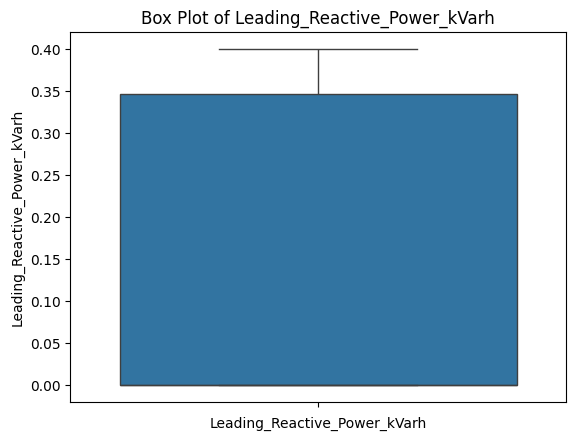

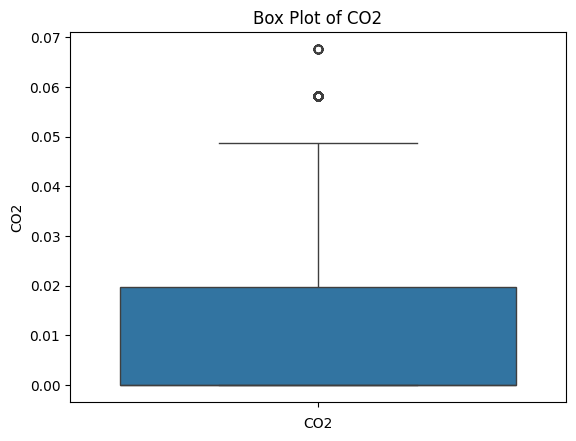

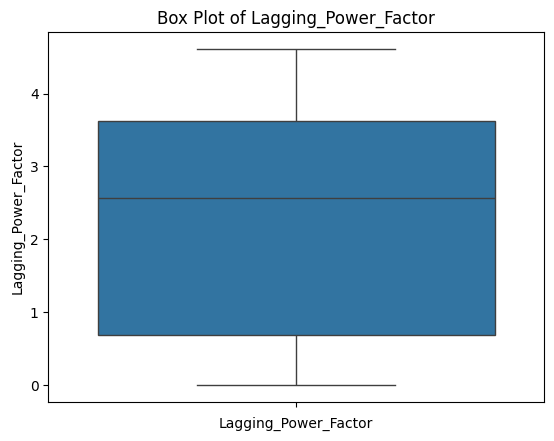

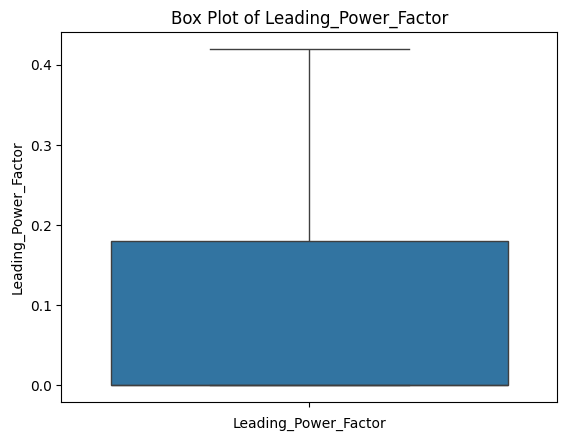

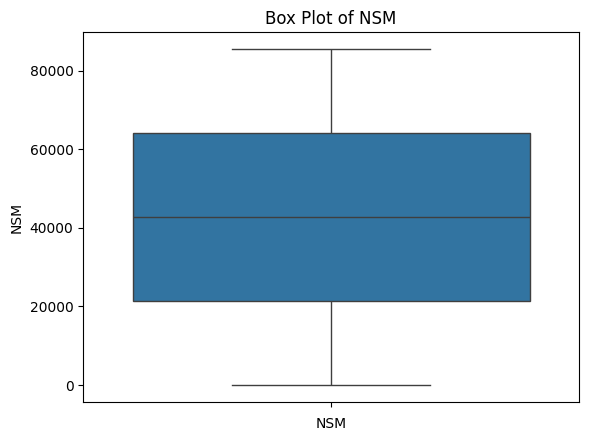

In [82]:
num_columns = transformed_data.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(8, 6))

for column in num_columns:
    plt.figure()
    sns.boxplot(y=transformed_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [83]:
# Select numerical columns from transformed_data
numerical_cols = transformed_data.select_dtypes(include=['int64', 'float64']).columns

def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Apply outlier detection to numerical columns of transformed_data
outliers = transformed_data[numerical_cols].apply(iqr_outliers)

# Identify rows with outliers in transformed_data
outlier_rows = transformed_data[outliers.any(axis=1)]

# Count total outlier rows in transformed_data
total_outlier_rows = len(outlier_rows)

print("Total outlier rows:", total_outlier_rows)


Total outlier rows: 437


In [84]:
# Count outliers for each numerical column
outlier_counts = outliers.sum()
print("Outlier counts per column:")
print(outlier_counts)

# Calculate percentage of outliers per column
outlier_percentage = (outlier_counts / len(transformed_data)) * 100
print("\nOutlier percentage per column:")
print(outlier_percentage)

Outlier counts per column:
Usage_kWh                         0
Lagging_Reactive_Power_kVarh      0
Leading_Reactive_Power_kVarh      0
CO2                             437
Lagging_Power_Factor              0
Leading_Power_Factor              0
NSM                               0
dtype: int64

Outlier percentage per column:
Usage_kWh                       0.000000
Lagging_Reactive_Power_kVarh    0.000000
Leading_Reactive_Power_kVarh    0.000000
CO2                             1.247146
Lagging_Power_Factor            0.000000
Leading_Power_Factor            0.000000
NSM                             0.000000
dtype: float64


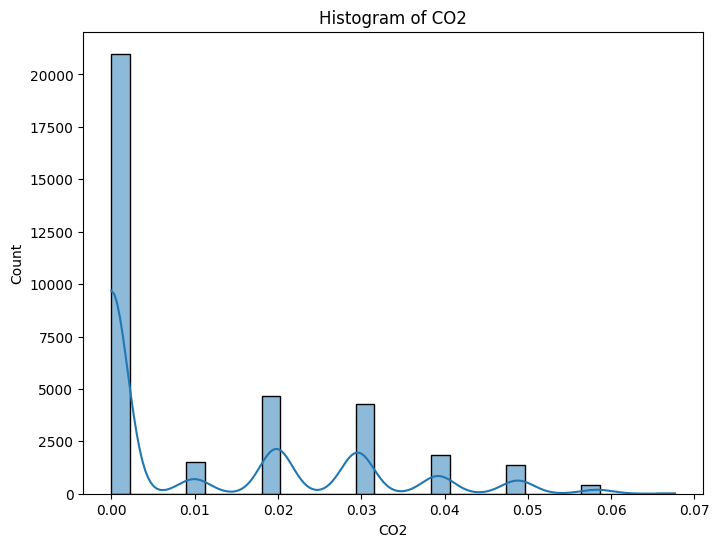

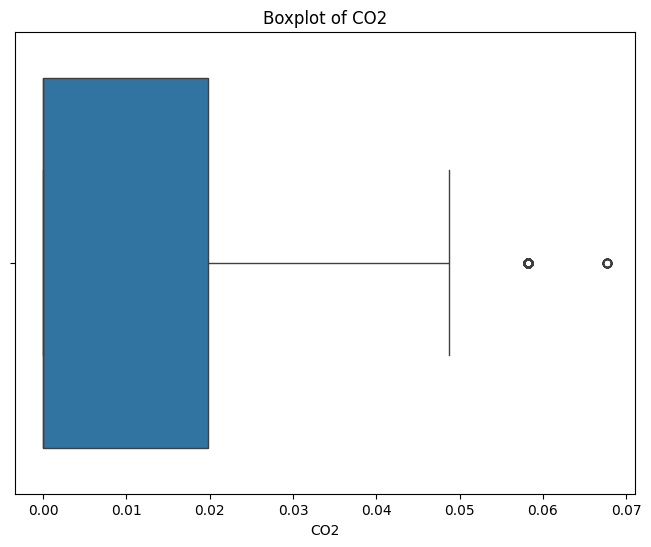

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(transformed_data['CO2'], kde=True, bins=30)
plt.title("Histogram of CO2")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=transformed_data, x='CO2')
plt.title("Boxplot of CO2")
plt.show()

In [86]:
lower_bound = transformed_data['CO2'].quantile(0.25) - 1.5 * (transformed_data['CO2'].quantile(0.75) - transformed_data['CO2'].quantile(0.25))
upper_bound = transformed_data['CO2'].quantile(0.75) + 1.5 * (transformed_data['CO2'].quantile(0.75) - transformed_data['CO2'].quantile(0.25))
transformed_data['CO2'] = transformed_data['CO2'].clip(lower=lower_bound, upper=upper_bound)

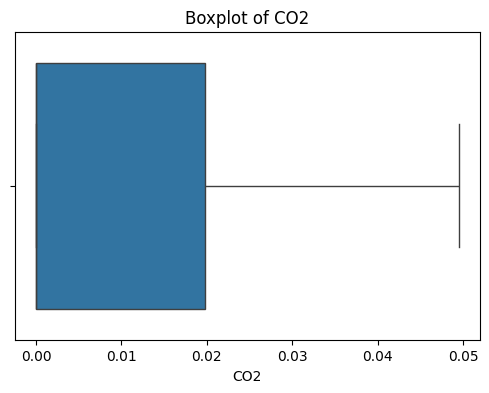

In [87]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=transformed_data, x='CO2')
plt.title("Boxplot of CO2")
plt.show()

In [88]:
transformed_data

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
0,1.427916,1.373716,0.00000,0.0,3.324676,0.000000,900
1,1.609438,1.697449,0.00000,0.0,3.533102,0.000000,1800
2,1.444563,1.453953,0.00000,0.0,3.424914,0.000000,2700
3,1.460938,1.517323,0.00000,0.0,3.493777,0.000000,3600
4,1.572774,1.704748,0.00000,0.0,3.591267,0.000000,4500
...,...,...,...,...,...,...,...
35035,1.578979,1.768150,0.00000,0.0,3.660994,0.000000,82800
35036,1.556037,1.556037,0.00000,0.0,3.410818,0.000000,83700
35037,1.564441,1.427916,0.06053,0.0,3.193763,0.019166,84600
35038,1.564441,1.401183,0.08821,0.0,3.147595,0.036790,85500


In [89]:
object_cols = df.select_dtypes(include=['object'])
# Reset index
transformed_data.reset_index(drop=True, inplace=True)
object_cols.reset_index(drop=True, inplace=True)
# Combine transformed_data and object_cols
df1 = pd.concat([transformed_data, object_cols], axis=1)

In [90]:
df1.shape

(35040, 10)

In [91]:
df1.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1.427916,1.373716,0.0,0.0,3.324676,0.0,900,Weekday,Monday,Light_Load
1,1.609438,1.697449,0.0,0.0,3.533102,0.0,1800,Weekday,Monday,Light_Load
2,1.444563,1.453953,0.0,0.0,3.424914,0.0,2700,Weekday,Monday,Light_Load
3,1.460938,1.517323,0.0,0.0,3.493777,0.0,3600,Weekday,Monday,Light_Load
4,1.572774,1.704748,0.0,0.0,3.591267,0.0,4500,Weekday,Monday,Light_Load


In [92]:
# Calculate Z-scores for numerical columns in transformed_data
z_scores = transformed_data.apply(zscore)

# Identify outliers where Z-score > 3 or < -3
z_outliers = (z_scores > 3) | (z_scores < -3)

In [93]:
z_outliers.sum()

Usage_kWh                       0
Lagging_Reactive_Power_kVarh    0
Leading_Reactive_Power_kVarh    0
CO2                             0
Lagging_Power_Factor            0
Leading_Power_Factor            0
NSM                             0
dtype: int64

In [94]:
df2 = transformed_data[~z_outliers.any(axis=1)]

print(f"Original rows: {len(transformed_data)}, Rows after Z-score treatment: {len(df2)}")

Original rows: 35040, Rows after Z-score treatment: 35040


In [95]:
df2= pd.concat([transformed_data, object_cols], axis=1)
df2

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1.427916,1.373716,0.00000,0.0,3.324676,0.000000,900,Weekday,Monday,Light_Load
1,1.609438,1.697449,0.00000,0.0,3.533102,0.000000,1800,Weekday,Monday,Light_Load
2,1.444563,1.453953,0.00000,0.0,3.424914,0.000000,2700,Weekday,Monday,Light_Load
3,1.460938,1.517323,0.00000,0.0,3.493777,0.000000,3600,Weekday,Monday,Light_Load
4,1.572774,1.704748,0.00000,0.0,3.591267,0.000000,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,1.578979,1.768150,0.00000,0.0,3.660994,0.000000,82800,Weekday,Monday,Light_Load
35036,1.556037,1.556037,0.00000,0.0,3.410818,0.000000,83700,Weekday,Monday,Light_Load
35037,1.564441,1.427916,0.06053,0.0,3.193763,0.019166,84600,Weekday,Monday,Light_Load
35038,1.564441,1.401183,0.08821,0.0,3.147595,0.036790,85500,Weekday,Monday,Light_Load


df1: Contains the dataset after IQR outlier treatment.

df2: Contains the dataset after Z-score outlier treatment

In [96]:
# Compare df1 and df2
df_comparison = df1.compare(df2)
print(df_comparison)

Empty DataFrame
Columns: []
Index: []


Value counts of WeekStatus
WeekStatus
Weekday    0.715068
Weekend    0.284932
Name: proportion, dtype: float64




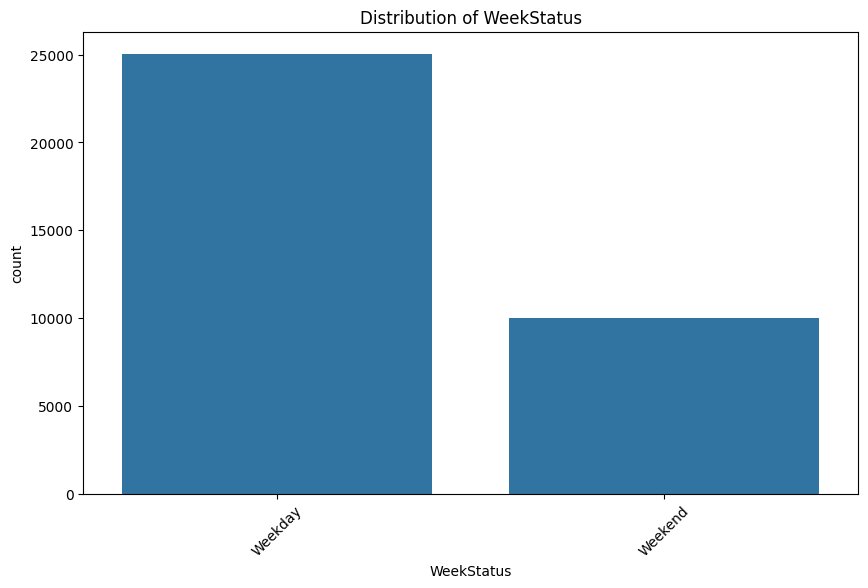

Value counts of Day_of_week
Day_of_week
Monday       0.145205
Tuesday      0.142466
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: proportion, dtype: float64




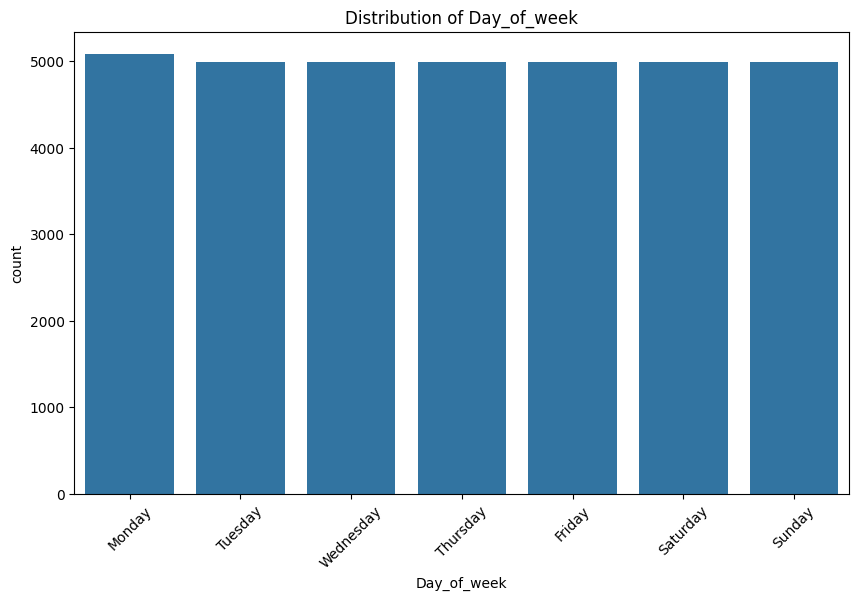

Value counts of Load_Type
Load_Type
Light_Load      0.515753
Medium_Load     0.276712
Maximum_Load    0.207534
Name: proportion, dtype: float64




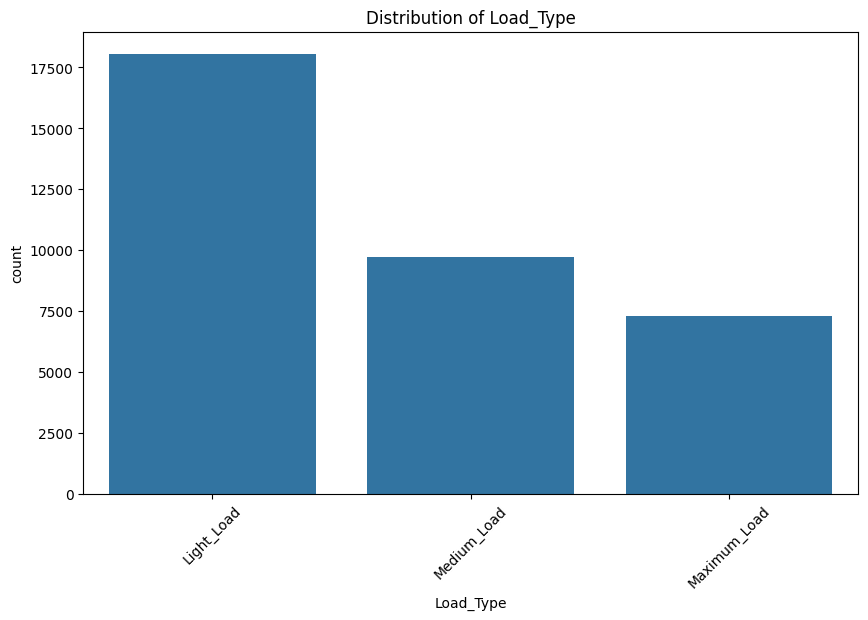

In [97]:
# Categorical variables analysis
for column in df1.select_dtypes(include=['object', 'bool']).columns:
    print(f'Value counts of {column}')
    print(df[column].value_counts(normalize=True))  
    print('\n')
    
    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()


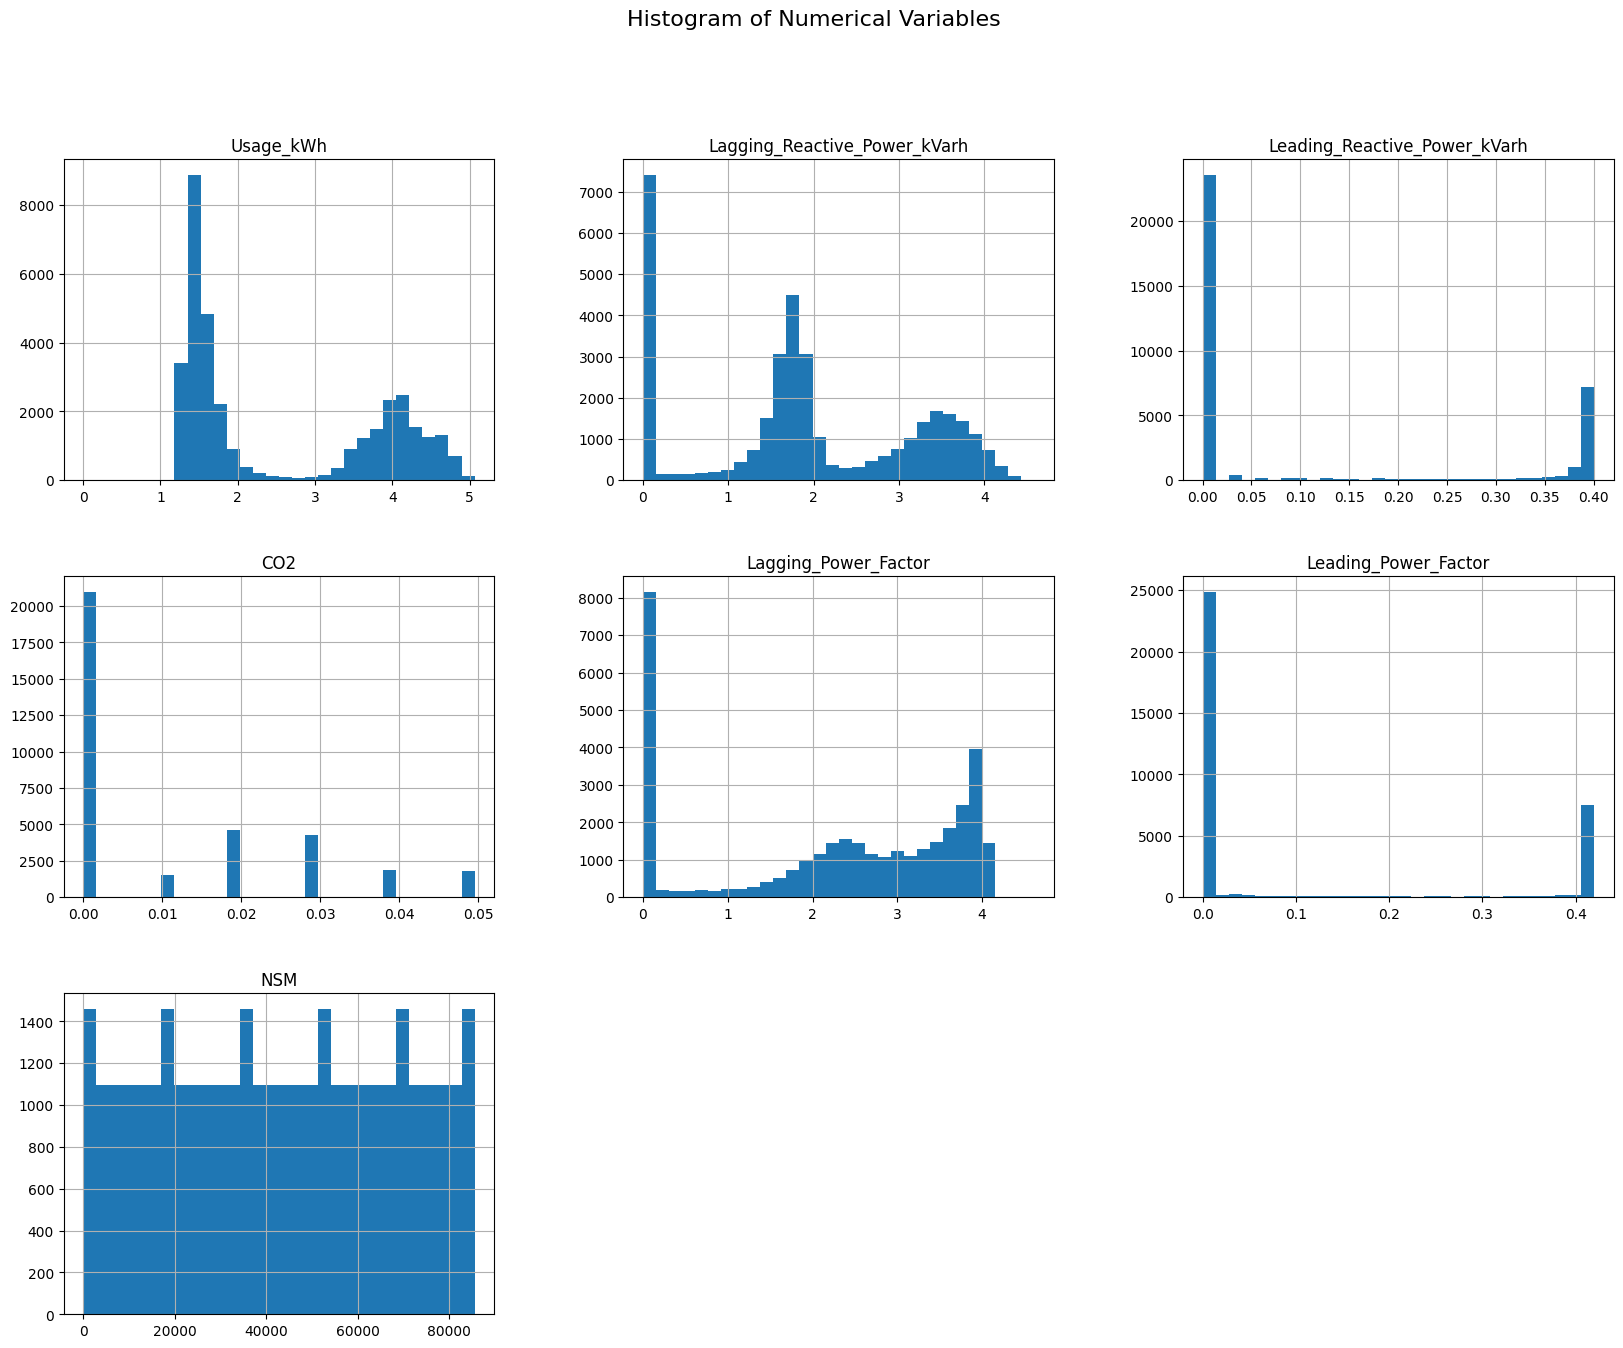

In [98]:
# Numerical variables analysis
df1.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histogram of Numerical Variables", fontsize=16)
plt.show()

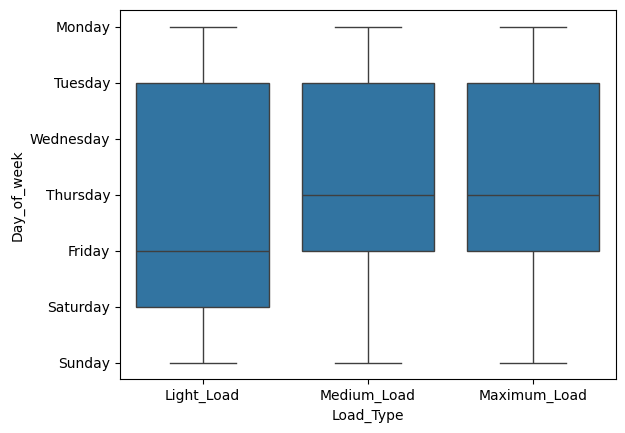

In [99]:
# Categorical vs categorical
sns.boxplot(x='Load_Type', y='Day_of_week', data=df1)
plt.show()

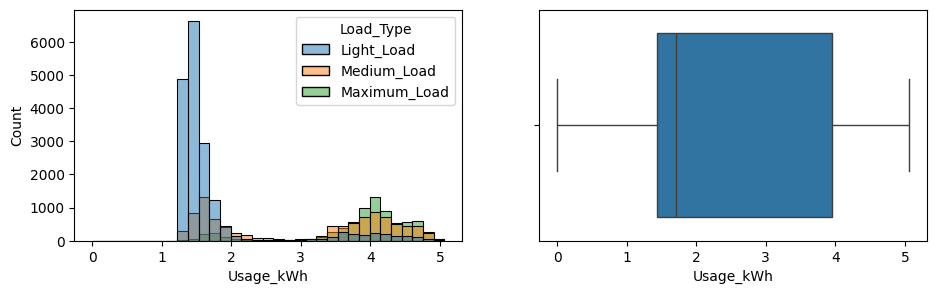

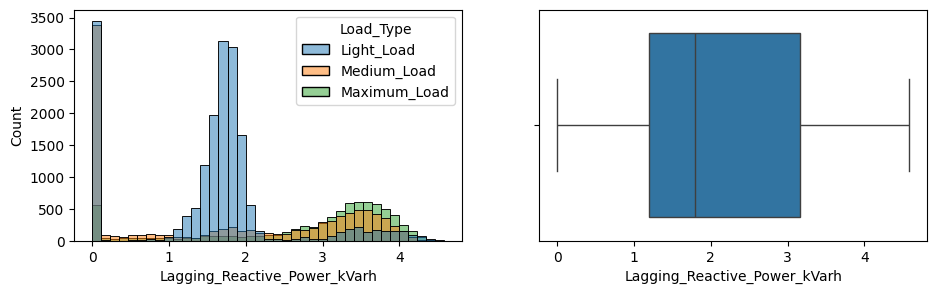

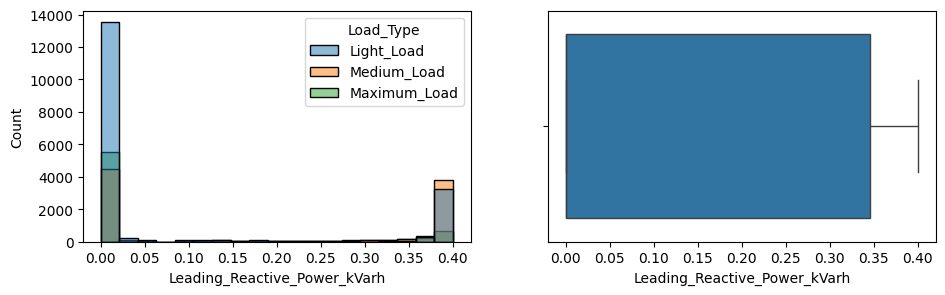

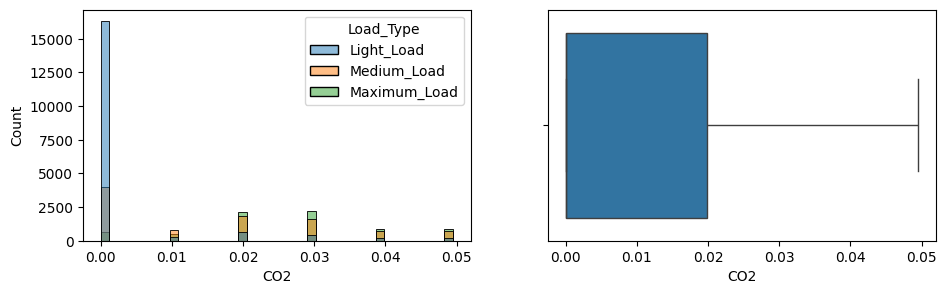

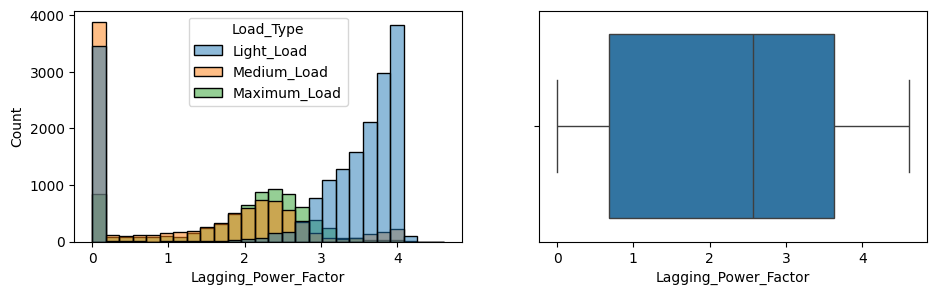

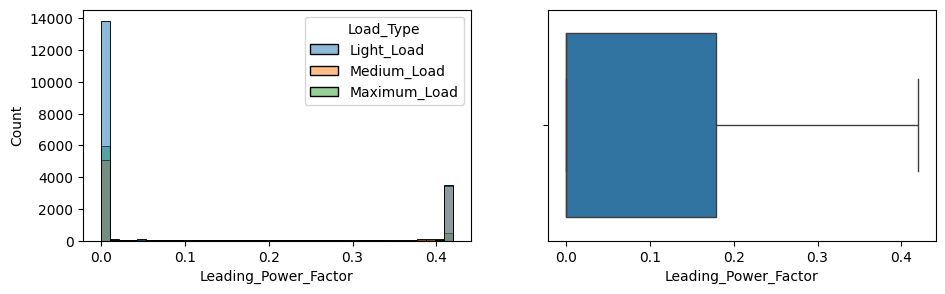

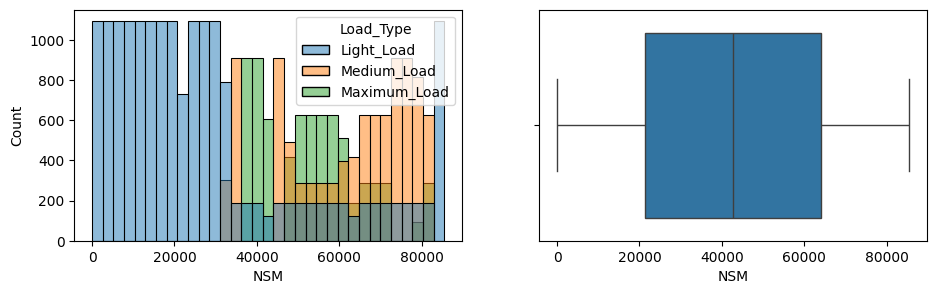

In [100]:
#Plot the numerical columns distribution and divided by Load_Type

numerical = df1.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(11,3))
    sns.histplot(data=df1, x=col, ax=ax[0],hue='Load_Type')
    sns.boxplot(data=df1, x=col, ax=ax[1])

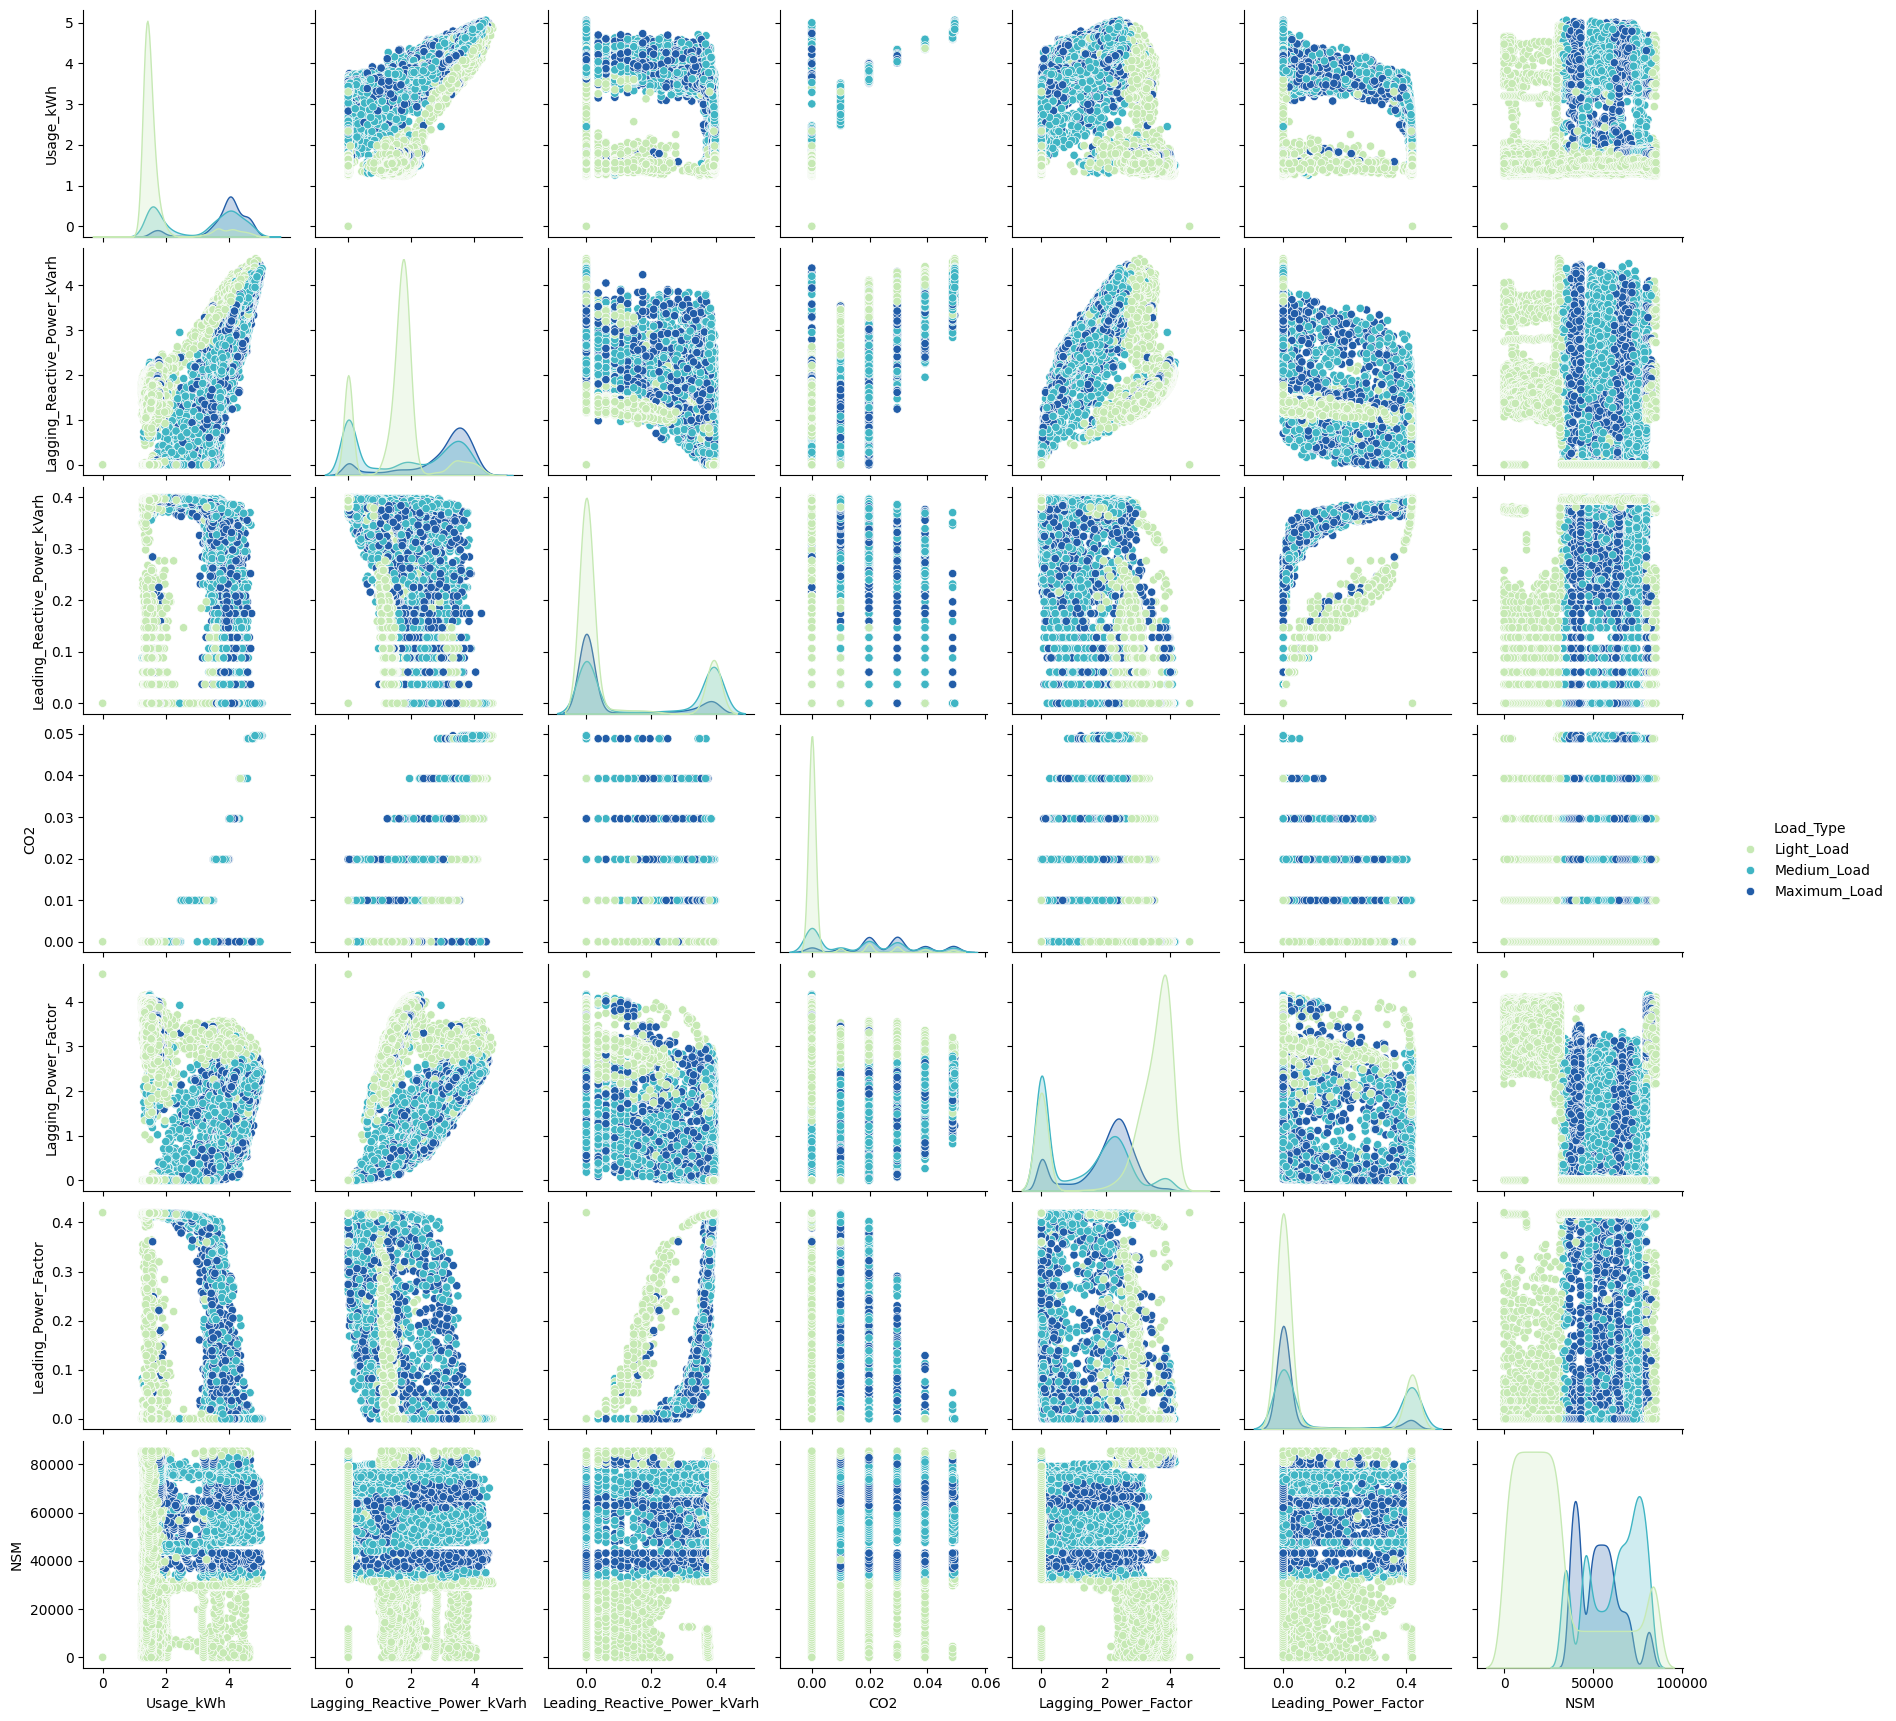

In [101]:
figsize=(24,12)
sns.pairplot(df1, hue='Load_Type', palette='YlGnBu')

## Encoding

In [102]:
enc = OneHotEncoder(sparse_output=False, drop='first')

encoded = enc.fit_transform(df1[['WeekStatus']])

encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['WeekStatus']))
encoded_df

,WeekStatus_Weekend
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
35035,0.0
35036,0.0
35037,0.0
35038,0.0


In [103]:
df1 = pd.concat([df1, encoded_df], axis=1)
df1

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,WeekStatus_Weekend
0,1.427916,1.373716,0.00000,0.0,3.324676,0.000000,900,Weekday,Monday,Light_Load,0.0
1,1.609438,1.697449,0.00000,0.0,3.533102,0.000000,1800,Weekday,Monday,Light_Load,0.0
2,1.444563,1.453953,0.00000,0.0,3.424914,0.000000,2700,Weekday,Monday,Light_Load,0.0
3,1.460938,1.517323,0.00000,0.0,3.493777,0.000000,3600,Weekday,Monday,Light_Load,0.0
4,1.572774,1.704748,0.00000,0.0,3.591267,0.000000,4500,Weekday,Monday,Light_Load,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35035,1.578979,1.768150,0.00000,0.0,3.660994,0.000000,82800,Weekday,Monday,Light_Load,0.0
35036,1.556037,1.556037,0.00000,0.0,3.410818,0.000000,83700,Weekday,Monday,Light_Load,0.0
35037,1.564441,1.427916,0.06053,0.0,3.193763,0.019166,84600,Weekday,Monday,Light_Load,0.0
35038,1.564441,1.401183,0.08821,0.0,3.147595,0.036790,85500,Weekday,Monday,Light_Load,0.0


In [104]:
df1.drop(columns=['WeekStatus'], inplace=True)
df1

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Day_of_week,Load_Type,WeekStatus_Weekend
0,1.427916,1.373716,0.00000,0.0,3.324676,0.000000,900,Monday,Light_Load,0.0
1,1.609438,1.697449,0.00000,0.0,3.533102,0.000000,1800,Monday,Light_Load,0.0
2,1.444563,1.453953,0.00000,0.0,3.424914,0.000000,2700,Monday,Light_Load,0.0
3,1.460938,1.517323,0.00000,0.0,3.493777,0.000000,3600,Monday,Light_Load,0.0
4,1.572774,1.704748,0.00000,0.0,3.591267,0.000000,4500,Monday,Light_Load,0.0
...,...,...,...,...,...,...,...,...,...,...
35035,1.578979,1.768150,0.00000,0.0,3.660994,0.000000,82800,Monday,Light_Load,0.0
35036,1.556037,1.556037,0.00000,0.0,3.410818,0.000000,83700,Monday,Light_Load,0.0
35037,1.564441,1.427916,0.06053,0.0,3.193763,0.019166,84600,Monday,Light_Load,0.0
35038,1.564441,1.401183,0.08821,0.0,3.147595,0.036790,85500,Monday,Light_Load,0.0


In [105]:
df1.WeekStatus_Weekend.value_counts()

WeekStatus_Weekend
0.0    25056
1.0     9984
Name: count, dtype: int64

In [106]:
#Mapping 'Day of week' to numbers
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df1['Day_of_week_num'] = df1['Day_of_week'].map(day_mapping)
df1.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Day_of_week,Load_Type,WeekStatus_Weekend,Day_of_week_num
0,1.427916,1.373716,0.0,0.0,3.324676,0.0,900,Monday,Light_Load,0.0,0
1,1.609438,1.697449,0.0,0.0,3.533102,0.0,1800,Monday,Light_Load,0.0,0
2,1.444563,1.453953,0.0,0.0,3.424914,0.0,2700,Monday,Light_Load,0.0,0
3,1.460938,1.517323,0.0,0.0,3.493777,0.0,3600,Monday,Light_Load,0.0,0
4,1.572774,1.704748,0.0,0.0,3.591267,0.0,4500,Monday,Light_Load,0.0,0


In [107]:
df1.Day_of_week.describe()

count      35040
unique         7
top       Monday
freq        5088
Name: Day_of_week, dtype: object

In [108]:
target_column = 'Load_Type' \

encoder = LabelEncoder()

# Apply Label Encoding to the target column
df1[target_column] = encoder.fit_transform(df1[target_column])

print(df1[[target_column, target_column]].head())

   Load_Type  Load_Type
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0


In [109]:
print("Mapping of target categories to numeric labels:")
print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))

Mapping of target categories to numeric labels:
{'Light_Load': 0, 'Maximum_Load': 1, 'Medium_Load': 2}


In [110]:
df1.Load_Type.describe()

count    35040.000000
mean         0.760959
std          0.857523
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          2.000000
Name: Load_Type, dtype: float64

In [111]:
df1.Load_Type.value_counts()

Load_Type
0    18072
2     9696
1     7272
Name: count, dtype: int64

In [112]:
df1.drop(columns=['Day_of_week'], inplace=True)
df1

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,WeekStatus_Weekend,Day_of_week_num
0,1.427916,1.373716,0.00000,0.0,3.324676,0.000000,900,0,0.0,0
1,1.609438,1.697449,0.00000,0.0,3.533102,0.000000,1800,0,0.0,0
2,1.444563,1.453953,0.00000,0.0,3.424914,0.000000,2700,0,0.0,0
3,1.460938,1.517323,0.00000,0.0,3.493777,0.000000,3600,0,0.0,0
4,1.572774,1.704748,0.00000,0.0,3.591267,0.000000,4500,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
35035,1.578979,1.768150,0.00000,0.0,3.660994,0.000000,82800,0,0.0,0
35036,1.556037,1.556037,0.00000,0.0,3.410818,0.000000,83700,0,0.0,0
35037,1.564441,1.427916,0.06053,0.0,3.193763,0.019166,84600,0,0.0,0
35038,1.564441,1.401183,0.08821,0.0,3.147595,0.036790,85500,0,0.0,0


## Feature Selection

In [113]:
X = df1.drop(columns=['Load_Type'])  # Drop the target variable
y = df1['Load_Type']  # Target variable

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.get_support()]  # Get feature names of selected features

# Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Usage_kWh', 'Lagging_Reactive_Power_kVarh',
       'Leading_Reactive_Power_kVarh', 'CO2', 'Lagging_Power_Factor',
       'Leading_Power_Factor', 'NSM', 'WeekStatus_Weekend', 'Day_of_week_num'],
      dtype='object')


In [114]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [233]:
X_train_scaled.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_num
0,-0.792844,-0.046903,-0.653611,-0.720356,1.038586,-0.595342,-0.593540,-0.635236,-0.001301
1,-0.977622,-0.260643,-0.653611,-0.720356,1.022613,-0.595342,-0.701874,1.574218,1.494907
2,-0.727787,-0.187991,-0.653611,-0.720356,0.817986,-0.595342,1.609249,-0.635236,-0.500038
3,0.897192,-0.704587,0.365382,0.559127,-1.468234,-0.595342,-0.268538,1.574218,0.996171
4,0.747162,-1.456386,1.513231,-0.077447,-1.526467,0.965048,0.850912,-0.635236,-0.998774


## Model Training and Testing

In [117]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "MLP": MLPClassifier(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [118]:
train_accuracy = {}
test_accuracy = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy for training and testing sets
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracy[model_name] = train_acc
    test_accuracy[model_name] = test_acc
    
    print(f"{model_name} Results:")
    print(f"Training Accuracy: {train_acc:.2f}")
    print(f"Testing Accuracy: {test_acc:.2f}")
    print(classification_report(y_test, y_test_pred))
    print("-" * 50)

print("\nSummary:")
print("Model\t\tTraining Accuracy\tTesting Accuracy")
for model_name in models.keys():
    print(f"{model_name:20} {train_accuracy[model_name]:.2f} \t\t {test_accuracy[model_name]:.2f}")


Logistic Regression Results:
Training Accuracy: 0.74
Testing Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5372
           1       0.55      0.49      0.52      2229
           2       0.60      0.66      0.63      2911

    accuracy                           0.74     10512
   macro avg       0.68      0.68      0.68     10512
weighted avg       0.74      0.74      0.73     10512

--------------------------------------------------
Decision Tree Results:
Training Accuracy: 1.00
Testing Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5372
           1       0.80      0.78      0.79      2229
           2       0.81      0.81      0.81      2911

    accuracy                           0.89     10512
   macro avg       0.86      0.86      0.86     10512
weighted avg       0.89      0.89      0.89     10512

-----------------------------------------

The XGBoost model stood out as the top performer. With a training accuracy of 95% and testing accuracy of 91%, it balanced both fit and generalization. 

### Hyperparameter Tuning

In [121]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost model
xgb = XGBClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV model
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5372
           1       0.82      0.84      0.83      2229
           2       0.85      0.82      0.83      2911

    accuracy                           0.91     10512
   macro avg       0.88      0.88      0.88     10512
weighted avg       0.91      0.91      0.91     10512

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


To further improve XGBoost’s performance, hyperparameter tuning was performed using grid search
After hyperparameter tuning, XGBoost emerged as the clear winner, demonstrating its robustness in handling diverse feature sets and capturing complex patterns.

XGBoost was selected as the final model for this project due to its superior performance in both training and testing phases. The model's ability to balance complexity and generalization, coupled with its high accuracy, precision, and recall, made it the ideal choice for predicting Load Types. The successful tuning of hyperparameters further improved its efficiency, solidifying its position as the most reliable model among those tested.

## Pipeline

In [123]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=200, max_depth=5, subsample=1.0, colsample_bytree=0.8))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the test set:", accuracy)


joblib.dump(pipeline, 'xgboost_pipeline.pkl')

print("Model pipeline saved successfully!")


Accuracy on the test set: 0.9055365296803652
Model pipeline saved successfully!


# Conclusion

## Model Implemented

The following machine learning models were trained and evaluated:

1.Logistic Regression

2.Decision Tree

3.Support Vector Machine (SVM)

4.Multilayer Perceptron (MLP)

5.XGBoost

The models were evaluated on accuracy, precision, recall, and F1-score.
Models that performed well on the training and testing accuracy were considered for further hyperparameter tuning.

**XGBoost** was selected as the best model based on performance metrics. Hyperparameter tuning was performed using GridSearchCV.

Best Hyperparameters:

    learning_rate: 0.2

    n_estimators: 200

    max_depth: 5

    subsample: 1.0

    colsample_bytree: 0.8

Accuracy: 0.91

Precision: 0.91

Recall: 0.91

F1-Score: 0.91

The XGBoost model performed exceptionally well, with high scores across all metrics, making it the ideal choice for the final model.

The trained model can now be used to classify new instances into one of the three load categories: Light_Load (0), Medium_Load (2), or Maximum_Load (1).
With a high level of accuracy (91%) and other positive evaluation metrics, the model is ready for real-world deployment.

Conclusion:

The model is effective in predicting the load category based on input features with strong performance across all evaluation metrics. Its deployment will allow for accurate, real-time predictions in systems where load categorization is essential.